<a href="https://colab.research.google.com/github/andreakdm/Tarea-6-QM2511/blob/main/Tarea_6_QM2511.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

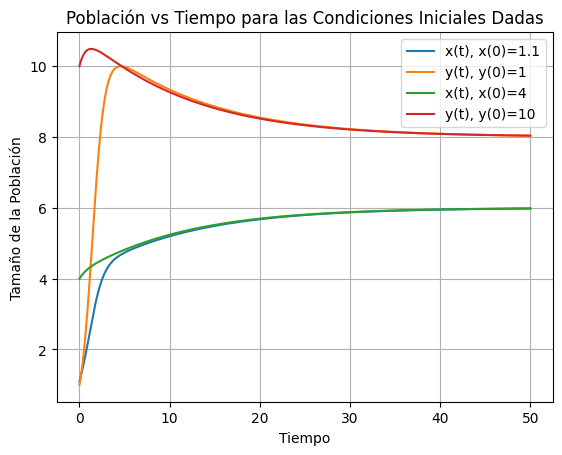

In [ ]:
from scipy.integrate import odeint
import matplotlib.pyplot as plt
import numpy as np

# Modelo de competencia definido por las ecuaciones dx/dt y dy/dt
def modelo(z, t):
    x, y = z
    dxdt = x * (1 - 0.1*x - 0.05*y)
    dydt = y * (1.7 - 0.1*y - 0.15*x)
    return [dxdt, dydt]

# Puntos de tiempo donde se calcula la solución
t = np.linspace(0, 50, 400)

# Condiciones iniciales caso a) x(0) = 1.1, y(0) = 1 y caso b) x(0) = 4, y(0) =10
condiciones_iniciales = [(1.1, 1), (4,10)]

for ic in condiciones_iniciales:
    # Resolver la EDO para las condiciones iniciales dadas
    z = odeint(modelo, ic, t)

    # Graficar resultados
    plt.plot(t,z[:,0], label=f'x(t), x(0)={ic[0]}')
    plt.plot(t,z[:,1], label=f'y(t), y(0)={ic[1]}')

plt.xlabel('Tiempo')
plt.ylabel('Tamaño de la Población')
plt.title('Población vs Tiempo para las Condiciones Iniciales Dadas')
plt.legend()
plt.grid(True)
plt.show()


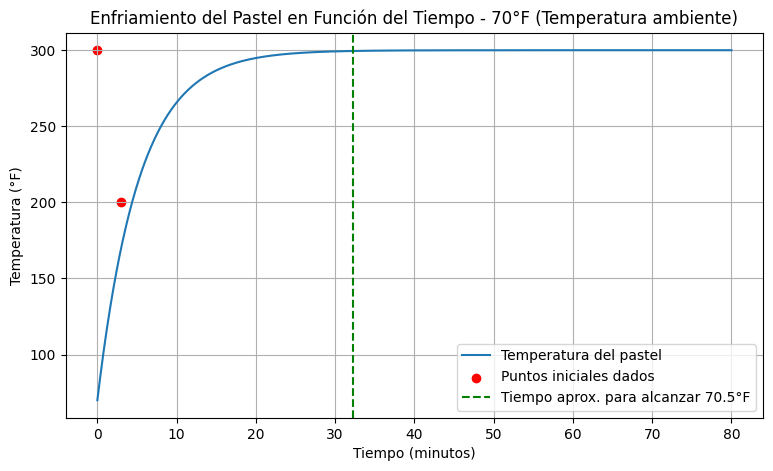

Este modelo asume que la temperatura del pastel se acerca asintóticamente a la temperatura ambiente.
Sin embargo, en la práctica, una vez que el pastel se ha enfriado suficiente,
se estabiliza en un equilibrio térmico con el entorno.


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math

# Definición de temperaturas iniciales y ambiente
T_inicial = 300   # Temperatura inicial del pastel en °F
T_3_min = 200    # Temperatura después de 3 minutos en °F
T_ambiente = 70  # Temperatura ambiente en °F

# Calculando la constante de proporcionalidad 'k'
k = -(math.log(abs(T_3_min - T_ambiente)) - math.log(abs(T_inicial - T_ambiente))) / (3 * 60)  # 3 minutos convertidos a segundos

# Función para calcular el tiempo hasta una temperatura objetivo
def calcular_tiempo(T_objetivo):
    return -((math.log(abs(T_objetivo - T_ambiente)) - math.log(abs(T_inicial - T_ambiente))) / k) / 60   # Tiempo en minutos

# Tiempos aprox para alcanzar 70.5°F y 69.5°F
tiempo_70_5 = calcular_tiempo(70.5)
tiempo_69_5 = calcular_tiempo(69.5)

# Rango de tiempos para la gráfica, hasta 80 minutos
tiempos_minutos = np.linspace(0, 80, num=1000)   # Conversión de minutos a segundos

# Calculando temperaturas para cada tiempo
temperaturas_f = T_inicial + (T_ambiente - T_inicial) * np.exp(-k * tiempos_minutos * 60)

# Creando la gráfica
plt.figure(figsize=(9, 5))
plt.plot(tiempos_minutos, temperaturas_f, label="Temperatura del pastel")
plt.scatter([0, 3], [T_inicial, T_3_min], color='red', label='Puntos iniciales dados')
plt.axvline(x=tiempo_70_5, color='green', linestyle='--', label="Tiempo aprox. para alcanzar 70.5°F")
plt.title("Enfriamiento del Pastel en Función del Tiempo - 70°F (Temperatura ambiente)")
plt.xlabel("Tiempo (minutos)")
plt.ylabel("Temperatura (°F)")
plt.grid(True)
plt.legend()
plt.show()

# Resultado
Resultado = ("Este modelo asume que la temperatura del pastel se acerca asintóticamente a la temperatura ambiente.\nSin embargo, en la práctica, una vez que el pastel se ha enfriado suficiente,\nse estabiliza en un equilibrio térmico con el entorno.")
print(Resultado)
